In [1]:
import tensorflow as tf
print(tf.__version__)

1.10.0


In [2]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [3]:
batch_size = 32
num_classes = 10
epochs = 40
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train.dtype)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
uint8


In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def no_batch_norm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    print(type(model))
    return model

In [7]:
myModel = no_batch_norm()

<class 'keras.engine.sequential.Sequential'>


In [8]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

myModel.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.dtype)
print(x_train[0,:5,:5])

float32
[[[ 0.23137255  0.24313726  0.24705882]
  [ 0.16862746  0.18039216  0.17647059]
  [ 0.19607843  0.1882353   0.16862746]
  [ 0.26666668  0.21176471  0.16470589]
  [ 0.38431373  0.28627452  0.20392157]
  [ 0.46666667  0.35686275  0.24705882]
  [ 0.54509807  0.41960785  0.29411766]
  [ 0.56862748  0.43137255  0.3137255 ]
  [ 0.58431375  0.45882353  0.34901962]
  [ 0.58431375  0.47058824  0.36470589]]

 [[ 0.0627451   0.07843138  0.07843138]
  [ 0.          0.          0.        ]
  [ 0.07058824  0.03137255  0.        ]
  [ 0.2         0.10588235  0.03137255]
  [ 0.34509805  0.2         0.08235294]
  [ 0.47058824  0.32156864  0.16862746]
  [ 0.50196081  0.34901962  0.17647059]
  [ 0.49803922  0.33725491  0.17254902]
  [ 0.49411765  0.34117648  0.19607843]
  [ 0.45490196  0.30980393  0.17254902]]

 [[ 0.09803922  0.09411765  0.08235294]
  [ 0.0627451   0.02745098  0.        ]
  [ 0.19215687  0.10588235  0.03137255]
  [ 0.32549021  0.19607843  0.09019608]
  [ 0.43137255  0.28235295  

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=3,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [7]:
datagen.fit(x_train)

MemoryError: 

In [19]:
history = myModel.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size*3),
                    epochs=40,
                    validation_data=(x_test, y_test),
                    workers=8)


Epoch 1/40
521/521 [==============================] - 27s 52ms/step - loss: 0.8741 - acc: 0.6969 - val_loss: 0.8146 - val_acc: 0.7206
Epoch 2/40
521/521 [==============================] - 27s 51ms/step - loss: 0.8721 - acc: 0.6944 - val_loss: 0.8035 - val_acc: 0.7263
Epoch 3/40
521/521 [==============================] - 26s 51ms/step - loss: 0.8689 - acc: 0.6954 - val_loss: 0.8026 - val_acc: 0.7234
Epoch 4/40
521/521 [==============================] - 27s 51ms/step - loss: 0.8637 - acc: 0.6983 - val_loss: 0.7557 - val_acc: 0.7369
Epoch 5/40
521/521 [==============================] - 27s 51ms/step - loss: 0.8559 - acc: 0.6986 - val_loss: 0.7978 - val_acc: 0.7297
Epoch 6/40
521/521 [==============================] - 27s 52ms/step - loss: 0.8447 - acc: 0.7030 - val_loss: 0.7579 - val_acc: 0.7373
Epoch 7/40
521/521 [==============================] - 26s 50ms/step - loss: 0.8496 - acc: 0.7031 - val_loss: 0.8557 - val_acc: 0.7122
Epoch 8/40
521/521 [==============================] - 28s 54ms

In [20]:
if not os.path.isdir("./models"):
    os.makedirs("./models")
myModel_save_path = "./models/model1.hdf5"
myModel.save(myModel_save_path)

In [21]:
scores = myModel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 109us/step
Test loss: 0.67722836132
Test accuracy: 0.7699


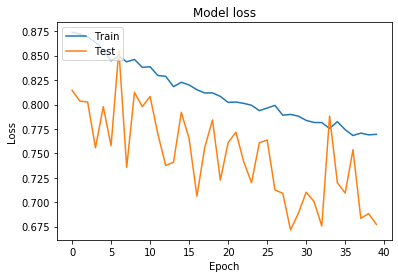

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Data Augmentation Visualization

In [ ]:
!ls -a
!echo ""
!rm -rf ./augmented_pictures/
!echo ""
!ls -a

In [24]:
#Visualize some results of data augmentation
import matplotlib.pyplot as plt
import PIL

def output_augmented(num):
    img = None
    sub_img= None
    name_list = None

    SAVE_PATH = "./augmented_pictures/"

    if not os.path.isdir(SAVE_PATH):
        os.makedirs(SAVE_PATH)

    gen_data = datagen.flow(x_train, 
                                           batch_size=1, 
                                           shuffle=False, 
                                           save_to_dir=SAVE_PATH,
                                           save_prefix='gen', )
    for i in range(9):
        gen_data.next() 
    
# name_list = os.listdir(SAVE_PATH)
# # print(name_list)
# fig = plt.figure()

# for i in range(len(name_list)):
#     img = PIL.Image.open(SAVE_PATH+name_list[i])
#     sub_img = fig.add_subplot(331 + i)
#     sub_img.imshow(img)
    
# plt.show()

    

In [ ]:
for i in range(3):
    output_augmented(i)
    name_list = os.listdir(SAVE_PATH)
    fig = plt.figure()
    for i in range(len(name_list)):
    img = PIL.Image.open(SAVE_PATH+name_list[i])
    sub_img = fig.add_subplot(331 + i)
    sub_img.imshow(img)
    